In [85]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import visualisation libraries
import visuals as vs
import seaborn as sns
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

from __future__ import division

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [87]:
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data['income'] == '>50K'])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data['income'] == '<=50K'])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = 100 * n_greater_50k / n_records

# Print the results
print( "Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print( "Individuals making at most $50,000: {}".format(n_at_most_50k))
print( "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


D:\project\FINDING_DONORS-main\visuals.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


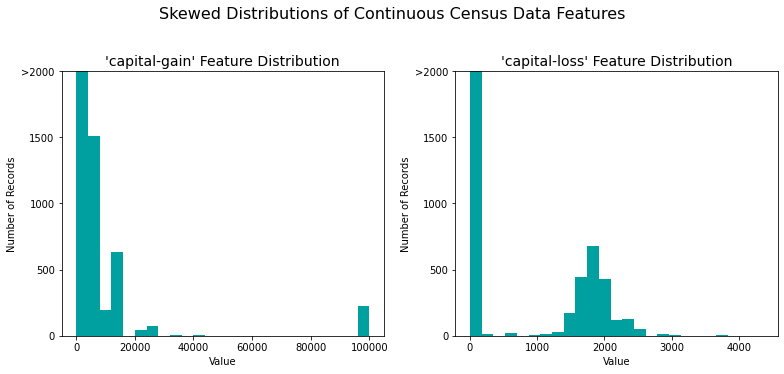

In [88]:
# Split the data into features and target label

income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

D:\project\FINDING_DONORS-main\visuals.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


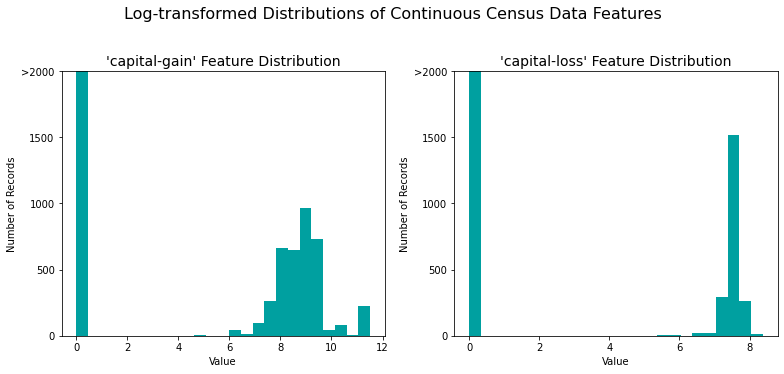

In [89]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_raw, transformed = True)

In [120]:


# Show an example of a record with scaling applied
display(features_raw.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,5,9,13,4,0,1,4,1,7.68,0.0,40,38
1,50,4,9,13,2,3,0,4,1,0.00,0.0,13,38
2,38,2,11,9,0,5,1,4,1,0.00,0.0,40,38
3,53,2,1,7,2,5,0,2,1,0.00,0.0,40,38
4,28,2,9,13,2,9,5,2,0,0.00,0.0,40,4


In [93]:
# TODO: One-hot encode the 'features_raw' data using pandas.get_dummies()
# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.apply(lambda x: 1 if x == '>50K' else 0)

In [95]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Define the categorical columns in your data
categorical_columns = ['workclass', 'education_level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# Label encode the categorical columns
for column in categorical_columns:
    features_raw[column] = label_encoder.fit_transform(features_raw[column])
    
# Round the values of capital_gain and capital_loss to 1 decimal place
features_raw['capital-gain'] = features_raw['capital-gain'].round(2)
features_raw['capital-loss'] = features_raw['capital-loss'].round(2)
# Convert education-num and hours-per-week to integers
features_raw['education-num'] = features_raw['education-num'].astype(int)
features_raw['hours-per-week'] = features_raw['hours-per-week'].astype(int)

# Print the updated dataframe
features_raw.head()


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,5,9,13,4,0,1,4,1,7.68,0.0,40,38
1,50,4,9,13,2,3,0,4,1,0.00,0.0,13,38
2,38,2,11,9,0,5,1,4,1,0.00,0.0,40,38
3,53,2,1,7,2,5,0,2,1,0.00,0.0,40,38
4,28,2,9,13,2,9,5,2,0,0.00,0.0,40,4


In [96]:
# Show an example of a record with scaling applied
display(features_raw.head(n = 1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,5,9,13,4,0,1,4,1,7.68,0.0,40,38


In [122]:
workclass_unique_values = data['workclass'].unique()
print(workclass_unique_values)

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']


In [123]:
workclass_unique_values = features_raw['workclass'].unique()
print(workclass_unique_values)


[5 4 2 0 1 3 6]


In [124]:
workclass_unique_values = data['education_level'].unique()
print(workclass_unique_values)

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']


In [125]:
workclass_unique_values = features_raw['education_level'].unique()
print(workclass_unique_values)


[ 9 11  1 12  6 15  7  5 10  8 14  4  0 13  2  3]


In [97]:
workclass_unique_values = features_raw['age'].unique()
print(workclass_unique_values)

[39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86
 89 87]


In [98]:
workclass_unique_values = features_raw['education-num'].unique()
print(workclass_unique_values)

[13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]


In [127]:
workclass_unique_values = features_raw['marital-status'].unique()
print(workclass_unique_values)

[4 2 0 3 5 1 6]


In [126]:
workclass_unique_values = data['marital-status'].unique()
print(workclass_unique_values)

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


In [129]:
workclass_unique_values = features_raw['occupation'].unique()
print(workclass_unique_values)

[ 0  3  5  9  7 11 13  4  6 12  2 10  1  8]


In [128]:
workclass_unique_values = data['occupation'].unique()
print(workclass_unique_values)

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']


In [130]:
workclass_unique_values = data['relationship'].unique()
print(workclass_unique_values)

[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


In [131]:
workclass_unique_values = features_raw['relationship'].unique()
print(workclass_unique_values)

[1 0 5 3 4 2]


In [38]:
workclass_unique_values = features_raw['race'].unique()
print(workclass_unique_values)

[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']


In [119]:
workclass_unique_values = features_raw['race'].unique()
print(workclass_unique_values)

[4 2 1 0 3]


In [132]:
workclass_unique_values = data['sex'].unique()
print(workclass_unique_values)

[' Male' ' Female']


In [133]:
workclass_unique_values = features_raw['sex'].unique()
print(workclass_unique_values)

[1 0]


In [99]:
workclass_unique_values = features_raw['capital-gain'].unique()
print(workclass_unique_values)

[ 7.68  0.    9.55  8.55  8.52  7.79  9.57  9.62  8.95  8.31  8.39  8.9
  7.25  8.21  6.96  7.63  7.69  6.39  9.91  8.83  8.32  9.06  8.14  7.86
 10.14  8.44  7.81  8.04  9.27  8.    8.11  8.15  8.49 11.51  8.78  7.29
  7.75  7.65  7.97  9.26  7.7   7.99 10.23  8.82  7.71  7.32  9.51  7.88
  8.62  8.47  8.24  8.05  8.25  6.82  6.    7.95  8.5   7.76  8.6   7.26
  8.09 10.    8.91 10.44  8.27  4.74  7.98  7.05  9.15  7.74  9.67 10.63
  8.41  7.84  7.52  8.97  8.65  9.17  8.77  7.28  7.62  8.28  7.51  9.37
  8.76  8.45  7.49  8.81  7.61  8.72  7.4   9.82 10.13  8.98  6.9   7.07
  7.78  8.53  6.99  7.14  8.89  7.46]


In [100]:
workclass_unique_values = features_raw['capital-loss'].unique()
print(workclass_unique_values)

[0.   7.62 7.25 7.55 7.54 7.45 7.48 7.36 7.69 7.5  7.59 7.2  7.7  7.46
 7.3  7.76 7.79 7.23 7.63 7.77 7.42 6.48 7.78 7.32 7.37 7.41 7.4  7.52
 7.6  7.72 7.38 7.84 7.8  7.04 7.71 6.44 5.37 7.34 6.78 7.   6.7  7.95
 7.85 6.88 7.68 7.67 7.14 7.86 7.73 5.78 7.39 7.51 8.24 7.47 8.21 7.66
 8.38 7.64 7.81 6.04 5.05 8.27 7.57 7.92 8.01 7.26 8.06 7.53 7.56]


In [101]:
workclass_unique_values = features_raw['hours-per-week'].unique()
print(workclass_unique_values)

[40 13 16 45 50 80 30 35 60 20 52 44 15 25 43 38 55 48 58 32 70 22 56 41
 28 36 24 46  2 42 12 65  1 34 75 98 33 54 10  6 64 19 18 72  8  9 47 37
 21 26 14  5  7 99 53 39 62 59 57 78 90 66 11 49 84 17 68  3 27 85 31 51
 77 63 23  4 87 88 73 89 97 94 29 96 67 82 86 91 81 76 92 61 74 95 79 69]


In [134]:
workclass_unique_values = data['native-country'].unique()
print(workclass_unique_values)

[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland' ' Columbia' ' Cambodia' ' Thailand' ' Ecuador' ' Laos'
 ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic' ' El-Salvador'
 ' France' ' Guatemala' ' Italy' ' China' ' South' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


In [135]:
workclass_unique_values = features_raw['native-country'].unique()
print(workclass_unique_values)

[38  4 22 18 25 32 15  8  1 10 19 29 30  3  0 36  6 24 35 13 31  5  7  9
 12 21  2 34 23 40 28 27 33 37 11 26 39 16 20 17 14]


In [104]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_raw, income, test_size = 0.2, random_state = 0)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print( "Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Train and evaluate Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)
dt_predictions = dt_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

# Train and evaluate Random Forest classifier
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
rf_predictions = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# Train and evaluate SVM classifier
svm_clf = SVC(random_state=0)
svm_clf.fit(X_train, y_train)
svm_predictions = svm_clf.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

# Train and evaluate AdaBoost classifier
ada_clf = AdaBoostClassifier(random_state=0)
ada_clf.fit(X_train, y_train)
ada_predictions = ada_clf.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_predictions)
print("AdaBoost Accuracy:", ada_accuracy)

# Train and evaluate XGBoost classifier
xgb_clf = XGBClassifier(random_state=0)
xgb_clf.fit(X_train, y_train)
xgb_predictions = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)


Decision Tree Accuracy: 0.8134881149806523
Random Forest Accuracy: 0.8452183526810393
SVM Accuracy: 0.8183526810392482
AdaBoost Accuracy: 0.8551686014372581
XGBoost Accuracy: 0.8709784411276948


In [67]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Create an XGBoost classifier
xgb_clf = XGBClassifier(random_state=0)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Best XGBoost Accuracy:", accuracy)
print("Best Hyperparameters:", best_params)


Best XGBoost Accuracy: 0.8688778330569376
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


In [69]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Initialize the classifiers
clf1 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=0))
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0)
clf4 = XGBClassifier(random_state=0)

# Create the ensemble classifier
ensemble_clf = VotingClassifier(estimators=[('adaboost', clf1), ('randomforest', clf2), ('svm', clf3), ('xgboost', clf4)], voting='hard')

# Fit the ensemble classifier on the training data
ensemble_clf.fit(X_train, y_train)

# Make predictions using the ensemble classifier
ensemble_predictions = ensemble_clf.predict(X_test)

# Report the accuracy and F-score of the ensemble classifier
print("Ensemble Model")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, ensemble_predictions)))


Ensemble Model
Accuracy score on testing data: 0.8616


In [107]:
import xgboost as xgb
import pickle

# Initialize the XGBoost classifier
clf = xgb.XGBClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Save the model weights as a pickle file
pickle.dump(clf, open('xgboost_model.pkl', 'wb'))

print("XGBoost model saved successfully.")


XGBoost model saved successfully.


In [114]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data using the trained XGBoost model
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy of the XGBoost model: {:.4f}".format(accuracy))


Accuracy of the XGBoost model: 0.8710


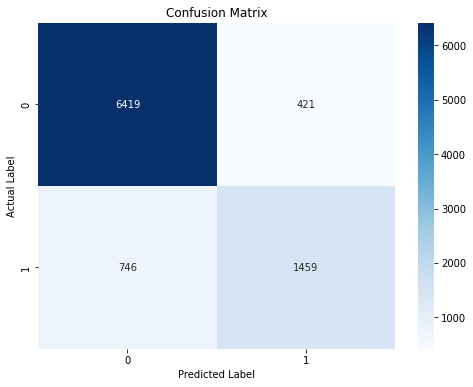

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


In [118]:
from sklearn.metrics import accuracy_score
import pandas as pd

# Convert y_test and y_pred to pandas Series
y_test_series = pd.Series(y_test)
y_pred_series = pd.Series(y_pred)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_series, y_pred_series)

# Print the accuracy
print("Accuracy of the XGBoost model: {:.4f}".format(accuracy))

# Display the actual and predicted labels for the first 10 inputs
print("Input\t\tActual Label\tPredicted Label")
for i in range(10):
    print("{}\t{}\t\t{}".format(X_test.iloc[i], y_test_series.iloc[i], y_pred_series.iloc[i]))


Accuracy of the XGBoost model: 0.8710
Input		Actual Label	Predicted Label
age                23.0
workclass           2.0
education_level     7.0
education-num      12.0
marital-status      2.0
occupation          4.0
relationship        5.0
race                4.0
sex                 0.0
capital-gain        0.0
capital-loss        0.0
hours-per-week     45.0
native-country     10.0
Name: 41387, dtype: float64	0		0
age                33.0
workclass           2.0
education_level    11.0
education-num       9.0
marital-status      2.0
occupation          6.0
relationship        0.0
race                4.0
sex                 1.0
capital-gain        0.0
capital-loss        0.0
hours-per-week     55.0
native-country     38.0
Name: 35278, dtype: float64	0		0
age                39.0
workclass           2.0
education_level    15.0
education-num      10.0
marital-status      0.0
occupation          3.0
relationship        1.0
race                4.0
sex                 1.0
capital-gain        

In [136]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# Load the XGBoost model
model = joblib.load('xgboost_model.pkl')

# Load the input data
input_data = pd.DataFrame({
    'age': [39],
    'workclass': ['State-gov'],
    'education_level': ['Bachelors'],
    'education-num': [13],
    'marital-status': ['Never-married'],
    'occupation': ['Adm-clerical'],
    'relationship': ['Not-in-family'],
    'race': ['White'],
    'sex': ['Male'],
    'capital-gain': [7.68],
    'capital-loss': [0.0],
    'hours-per-week': [40],
    'native-country': ['United-States']
})

# Label encode the categorical columns
categorical_columns = ['workclass', 'education_level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
label_encoder = LabelEncoder()
for column in categorical_columns:
    input_data[column] = label_encoder.fit_transform(input_data[column])

# Make predictions
predictions = model.predict(input_data)

# Print the predictions
print(predictions)


[0]


In [138]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# Load the XGBoost model
model = joblib.load('xgboost_model.pkl')

# Load the input data
input_data = pd.DataFrame({
    'age': [25],
    'workclass': ['Private'],
    'education_level': ['Some-college'],
    'education-num': [11],
    'marital-status': ['Separated'],
    'occupation': ['Machine-op-inspct'],
    'relationship': ['Not-in-family'],
    'race': ['Other'],
    'sex': ['Male'],
    'capital-gain': [10.23],
    'capital-loss': [0.0],
    'hours-per-week': [40],
    'native-country': ['United-States']
})

# Label encode the categorical columns
categorical_columns = ['workclass', 'education_level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
label_encoder = LabelEncoder()
for column in categorical_columns:
    input_data[column] = label_encoder.fit_transform(input_data[column])

# Make predictions
predictions = model.predict(input_data)

# Print the predictions
print(predictions)


[1]


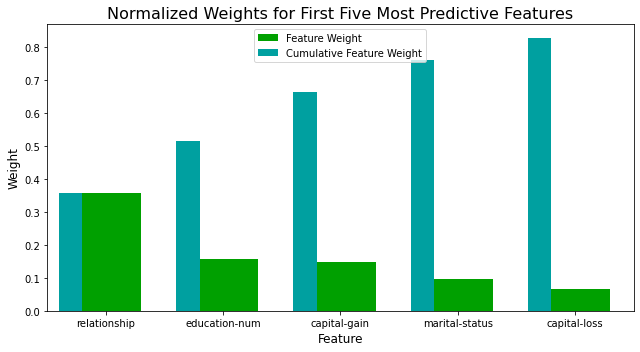

In [139]:
# TODO: Import a supervised learning model that has 'feature_importances_'

# TODO: Train the supervised model on the training set 
model = model.fit(X_train,y_train)

# TODO: Extract the feature importances
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)